In [8]:
import numpy as np
import pandas as pd 



in_file = 'titanic_train.csv'
full_data = pd.read_csv(in_file)

full_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Project Description
The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. 
Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 


In [ ]:
#imported data by downloading csv file

In [9]:
type(full_data)

pandas.core.frame.DataFrame

In [10]:
# Store the 'Survived' feature in a new variable and remove it from the dataset

# This stores the column 'Survived' in the variable outcomes
# This is also the response series (vector), y
outcomes = full_data['Survived']

# df.drop() drops categories or rows
# In this case as axis=1, it's droppping the category 'Survived'
# This are the features DataFrame (matrix) X
data = full_data.drop('Survived', axis = 1)

# Show the new dataset with 'Survived' removed
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Making predictions

In [27]:
def accuracy_score(truth, pred):
    " Returns accuracy score for input truth and predictions. "

    # Ensure that the number of predictions matches number of outcomes
    if len(truth) == len(pred):
        return "Predictions have an accuracy of {:.2f}.", format((truth==pred).mean()*100)
    else:
        return "Number of predictions does not match number of outcomes!"

predictions = pd.Series(np.ones(5, dtype = int))

print (accuracy_score(outcomes[:5], predictions))

('Predictions have an accuracy of {:.2f}.', '60.0')


In [28]:
def predictions_0(data):
    """ Model with no features. Always predicts a passenger did not survive. """

    predictions = []

    # for index, row in data.iterrows()
    for index, passenger in data.iterrows():

        # Predict the survival of 'passenger'
        predictions.append(0)

    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_0(data)

# As you can see, everything is 0 here because we predicted that no one survived
predictions.head()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [35]:
# the null accuracy is 61.62%
print (accuracy_score(outcomes, predictions))

('Predictions have an accuracy of {:.2f}.', '61.61616161616161')


In [37]:
full_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
full_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

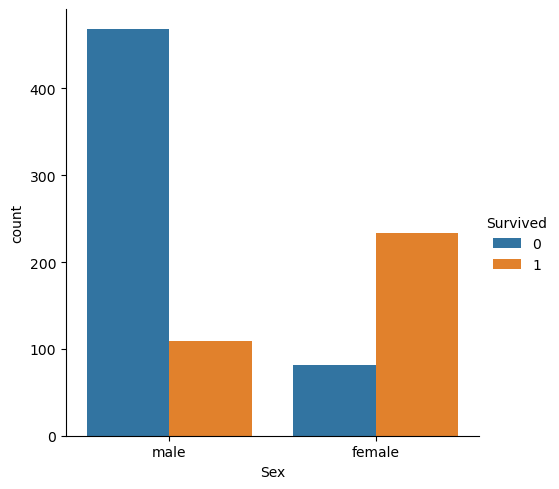

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot
sns.catplot(x ="Sex", hue ="Survived",
kind ="count", data = full_data)


In [41]:
# Group the dataset by Pclass and Survived and then unstack them
group = full_data.groupby(['Pclass', 'Survived'])
pclass_survived = group.size().unstack()
 


In [49]:
# Heatmap - Color encoded 2D representation of data.
sns.heatmap (pclass_survived, annot = True, fmt ="d")

<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

In [48]:
sns.violinplot(x ="Sex", y ="Age", hue ="Survived",
data = full_data, split = True)

<AxesSubplot:xlabel='Sex', ylabel='Age'>